In [ ]:
import json

In [1]:
import pandas as pd

In [ ]:
with open('/content/drive/MyDrive/hakaton/general_categories_mapping.json', 'r') as file:
    data = json.load(file)

In [ ]:
data

{'1016160': 'Воланы',
 '16065434': 'Катетеры урологические',
 '15450095': 'Винные шкафы',
 '91230': 'Pop',
 '819169': 'Корректоры метаболизма хрящевой ткани',
 '294642': 'Чейнджеры',
 '15259392': 'Плазменная резка',
 '90907': 'Нормативные акты и документы (inactive)',
 '90921': 'Антикварные и редкие книги (inactive)',
 '6856242': 'Зарядные устройства для аккумуляторов',
 '961226': 'Тренировочные снаряды',
 '418700': 'Ласты',
 '7962984': 'Аксессуары',
 '14213973': 'Консервные ножи и закаточные машинки',
 '15093378': 'Комфортеры',
 '6391089': 'Пробковый пол',
 '14369211': 'Уход за стеклами и фарами',
 '15085725': 'Укулеле',
 '14295737': 'Аксессуары',
 '15775109': 'Бачки для унитазов',
 '947515': 'Для бизнеса',
 '14732168': 'Строительные тенты',
 '6368402': 'Инкубаторы',
 '13062140': 'Самогонные аппараты',
 '819421': 'Бальзамы, эликсиры и сиропы',
 '819422': 'Горчичники',
 '819423': 'Растворы, настойки',
 '2562535': 'Инкассации',
 '14405299': 'Лампы для автомобилей',
 '14420937': 'Художес

In [ ]:
with open('/content/drive/MyDrive/hakaton/train.json', 'r') as file:
    train_data = json.load(file)

In [ ]:
train_data

Output hidden; open in https://colab.research.google.com to view.

In [3]:
df.head(15)

,Unnamed: 0,user-id,site-id,created-at,item-id,count,general-category-path,brand-id,target
0,0,user_1,1,1634292444,NaN,NaN,NaN,NaN,0
1,1,user_1,2,1639827297,NaN,NaN,NaN,NaN,0
2,2,user_1,2,1639827681,NaN,NaN,NaN,NaN,0
3,3,user_3,21,1684248081,NaN,NaN,NaN,NaN,1
4,4,user_3,22,1684892551,item_1,1.0,NaN,NaN,1
5,5,user_4,2,1600677045,item_8,1.0,NaN,NaN,1
6,6,user_4,29,1611987662,item_9,1.0,"[90404, 90403, 90402]",3243.0,1
7,7,user_4,29,1655426430,item_10,1.0,"[90698, 7330336, 90692, 90666]",1210537.0,1
8,8,user_4,29,1655426430,item_11,1.0,"[8353924, 91497, 91461, 198119]",1773.0,1
9,9,user_4,30,1681785620,NaN,NaN,NaN,NaN,1


In [3]:
df['site-id'].nunique()

902

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

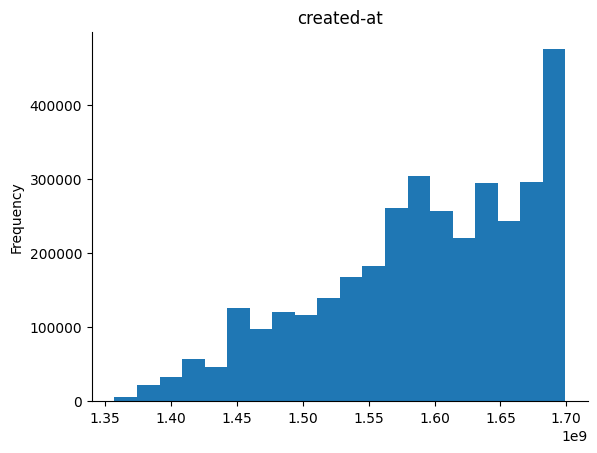

In [5]:
df['created-at'].plot(kind='hist', bins=20, title='created-at')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3458398 entries, 0 to 3458397
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   user-id                object 
 2   site-id                int64  
 3   created-at             int64  
 4   item-id                object 
 5   count                  float64
 6   general-category-path  object 
 7   brand-id               float64
 8   target                 int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 237.5+ MB


Колличество нулевых значений в каждом столбце наглядно. В brand-id и general-category-path их слишком много - больше чем заполненных данных.

<Axes: >

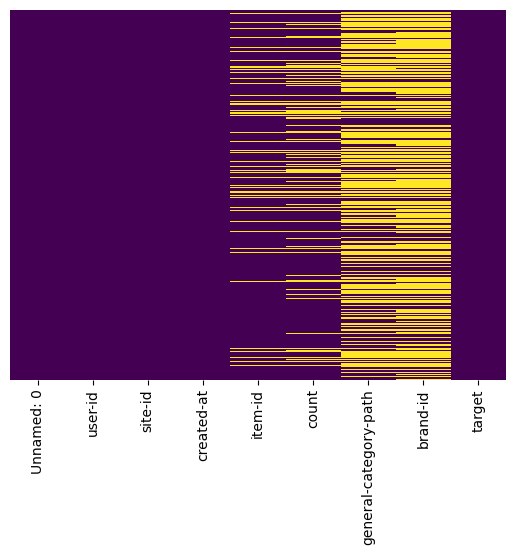

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df['brand-id'].isnull().sum()

2101171

In [6]:
df['brand-id'].notna().sum()

1357227

In [9]:
df['brand-id'].notna().sum() - df['brand-id'].isnull().sum()

-743944

Таким образом заполненных данных по этому столбцу меньше, чем None. И хотя их все равно достаточно в датасете, но, ИМХО, нужно делать одно из двух - или удалить все незаполненные столбцы, сократив наш датасет практически вполовину (при этом он все равно останется довольно много данных) либо, что на мой взгляд лучше, удалить этот признак как нерелевантный и выбрать для анализа item-id, где пропусков значительно меньше.

In [10]:
df_visits = pd.read_csv('/content/drive/MyDrive/МФТИ/hakaton/train_visits.csv')

In [11]:
df_visits.head(15)

,Unnamed: 0,user-id,site-id,first-seen,last-seen,visited-at,session-duration,pages-count,visited-items,visited-general-categories,visited-universal_brands,target
0,0,user_2,3,1696277805,1696278323,1696277805,0,1,NaN,NaN,NaN,0
1,1,user_2,3,1696277805,1696278323,1696278323,112,2,NaN,NaN,NaN,0
2,2,user_3,3,1696320204,1696320204,1696320204,0,1,NaN,NaN,NaN,1
3,3,user_3,23,1686372887,1686899354,1686372887,296,13,['item_2'],NaN,NaN,1
4,4,user_3,23,1686372887,1686899354,1686805600,37,5,['item_2'],NaN,NaN,1
5,5,user_3,23,1686372887,1686899354,1686899354,99,5,NaN,NaN,NaN,1
6,6,user_3,16,1680410306,1686982782,1681145345,558,6,"['item_3', 'item_4', 'item_5']","['91461', '198119', '91491']","['1', '921']",1
7,7,user_3,16,1680410306,1686982782,1686373121,93,3,NaN,NaN,NaN,1
8,8,user_3,16,1680410306,1686982782,1686711421,1189,10,"['item_6', 'item_7']","['91461', '198119', '91491']",['1'],1
9,9,user_3,16,1680410306,1686982782,1686805443,105,2,NaN,NaN,NaN,1


In [13]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648012 entries, 0 to 2648011
Data columns (total 12 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   Unnamed: 0                  int64 
 1   user-id                     object
 2   site-id                     int64 
 3   first-seen                  int64 
 4   last-seen                   int64 
 5   visited-at                  int64 
 6   session-duration            int64 
 7   pages-count                 int64 
 8   visited-items               object
 9   visited-general-categories  object
 10  visited-universal_brands    object
 11  target                      int64 
dtypes: int64(8), object(4)
memory usage: 242.4+ MB


<Axes: >

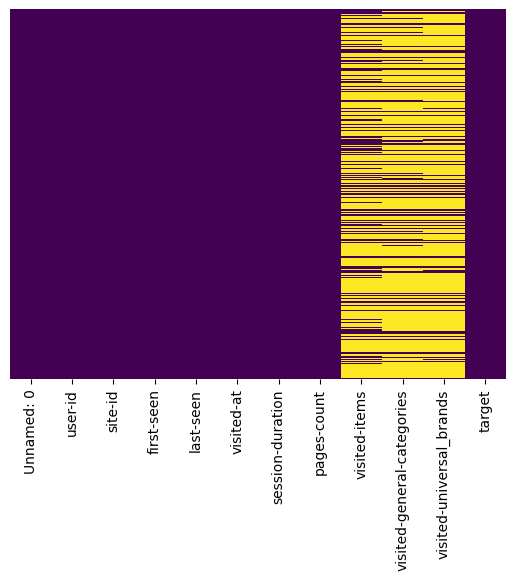

In [12]:
sns.heatmap(df_visits.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Здесь я бы удалила visited-items,
visited-general-categories и visited-universal_brands.

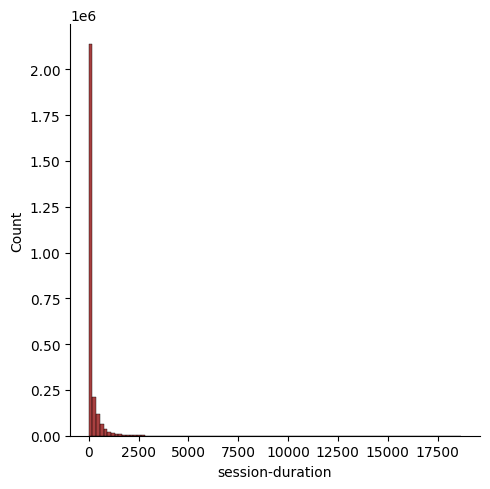

In [15]:
sns.displot(df_visits['session-duration'],kde=False,color='darkred',bins=100)

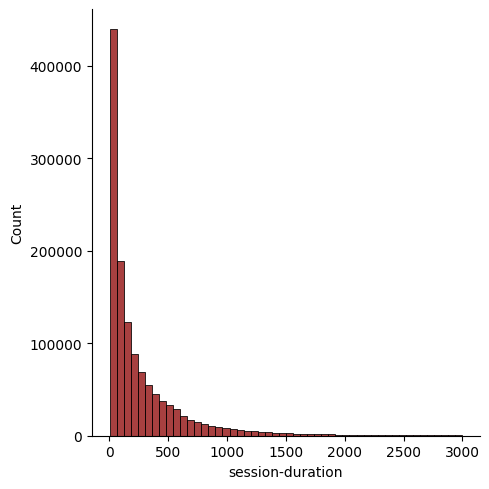

In [30]:
sns.displot(df_visits['session-duration'][(df_visits['session-duration'] < 3000) & (df_visits['session-duration'] > 0)],kde=False,color='darkred',bins=50)

Как видно, значительная часть пользователей имеют длительность сессии 0, однако это тоже информация о поведении пользователя, которая может нам пригодиться. Посмотрим, как зависит длительность сессии от нашего таргета, т.е. пола.

Джойнтплот не самый лучший вариант для двух четко разделенных классов, но в других вариантах было видно еще хуже.

Здесь, на мой взгляд, достаточно хорошо видно, что паттерны поведения мужчин и женщин отличаются (в основном с правого края графика).

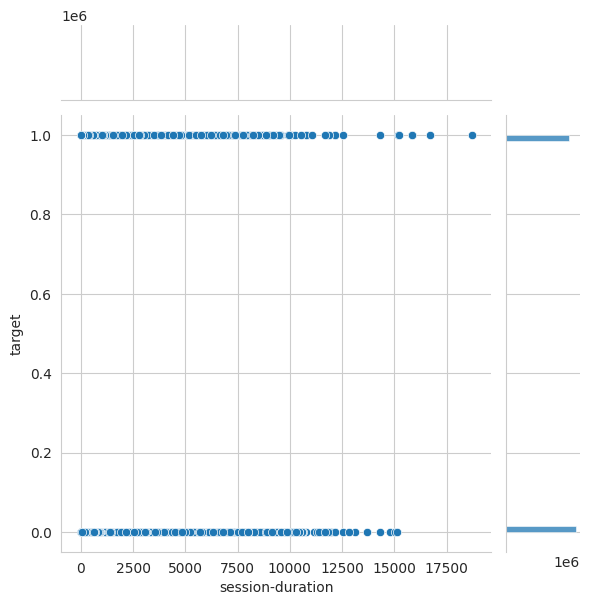

In [33]:
sns.jointplot(x='session-duration',y='target',data=df_visits)

Количество посещенных страниц у мужчин и женщин тоже заметно отличается. Мне представляются две эти характеристики достаточно перспективными для обучения. Однако надо уточнить, насколько коррелируют эти два столбца между собой.

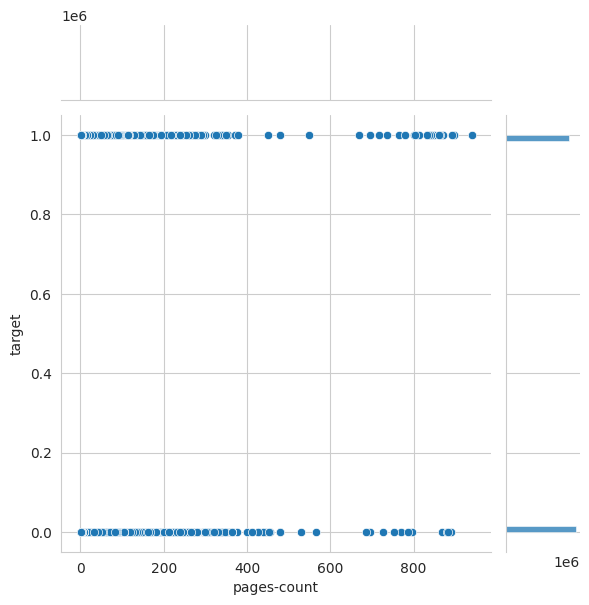

In [36]:
sns.jointplot(x='pages-count',y='target',data=df_visits)

In [39]:
df_visits[['pages-count', 'session-duration']].corr()

,pages-count,session-duration
pages-count,1.000000,0.733429
session-duration,0.733429,1.000000


<Axes: >

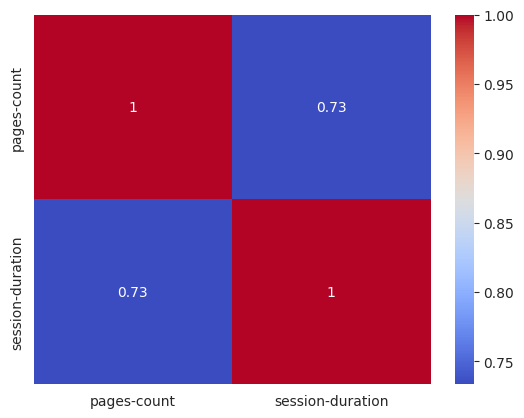

In [40]:
sns.heatmap(df_visits[['pages-count', 'session-duration']].corr(), annot=True, cmap='coolwarm')

Как мы видим, эти два показателя сильно скоррелированны. Для повышения точности модели можно попробовать выбрать что-то одно.

Если мы посмотрим на корреляцию категорий с нашим желаемым таргетом, то лучше оставить "pages-count", т.к. у него выше корреляция (отрицательная) с таргетом.

Вообще, судя по матрице, самая высокая корреляция у таргета с 'first-seen'. Также перспективным видится показатель  'visited-at' и его корреляция с 'first-seen' всего 45%, так что, имхо, можно использовать оба эти признака.

<Axes: >

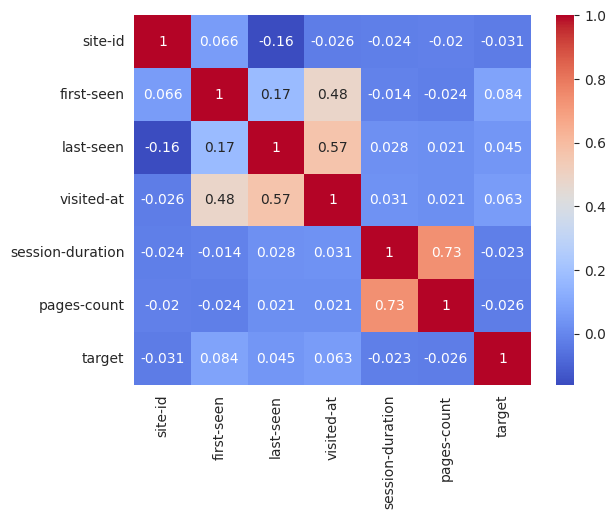

In [41]:
sns.heatmap(df_visits[['site-id', 'first-seen', 'last-seen', 'visited-at','session-duration', 'pages-count', 'target']].corr(), annot=True, cmap='coolwarm')

Посмотрим вообще насколько сбалансированны наши классы.  

<Axes: xlabel='target', ylabel='count'>

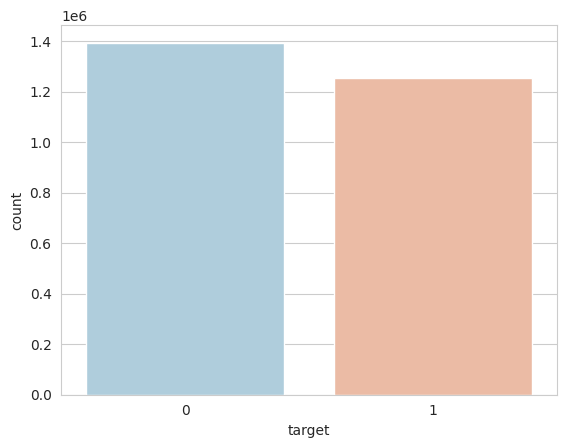

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df_visits,palette='RdBu_r')

male   - 1
female - 0

Женщин несколько больше, но в целом, ИМХО, это не должно создавать проблемы, данные достаточно сбалансированны для машинного обучения. Для повышения точности можно попробовать уравнять классы, удалив часть данных по женщинам, где больше всего пропусков в других фичах, и посмотреть, как это отразится н аработе алгоритма.